### References
- https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
- https://www.sbert.net/docs/usage/semantic_textual_similarity.html
- https://towardsdatascience.com/how-to-cluster-similar-sentences-using-tf-idf-and-graph-partitioning-in-python-5fb70627a4e0

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

# Single list of sentences
sentences = ['HDMI is flickering',
             'Books not available',
             'Internet slow',
             'Water leaking',
             'HDMI monitor not working',
             'College needs to make books available in the library',
             'Floor is wet',
             'i almost slipped because floor is very wet']

# tripadvisor_df = pd.read_csv("tripadvisor_hotel_reviews.csv")
# sentences = tripadvisor_df['Review'].to_numpy()[:10]

#Compute embeddings
embeddings = model.encode(sentences, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(embeddings, embeddings)
print("=====")
print(cosine_scores)
print("=====")

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in pairs[0:10]:
    i, j = pair['index']
    print("{} --- {} --- Score: {:.4f}".format(sentences[i], sentences[j], pair['score']))

=====
tensor([[ 1.0000,  0.0327,  0.2399,  0.2270,  0.6098,  0.0272,  0.0214,  0.0788],
        [ 0.0327,  1.0000,  0.1269,  0.1244,  0.1311,  0.6025,  0.0734,  0.0977],
        [ 0.2399,  0.1269,  1.0000,  0.1702,  0.0610,  0.0494,  0.0884,  0.0704],
        [ 0.2270,  0.1244,  0.1702,  1.0000,  0.0957,  0.0174,  0.4033,  0.3272],
        [ 0.6098,  0.1311,  0.0610,  0.0957,  1.0000,  0.0369,  0.0134,  0.0188],
        [ 0.0272,  0.6025,  0.0494,  0.0174,  0.0369,  1.0000, -0.0584, -0.0379],
        [ 0.0214,  0.0734,  0.0884,  0.4033,  0.0134, -0.0584,  1.0000,  0.6779],
        [ 0.0788,  0.0977,  0.0704,  0.3272,  0.0188, -0.0379,  0.6779,  1.0000]])
=====
Floor is wet --- i almost slipped because floor is very wet --- Score: 0.6779
HDMI is flickering --- HDMI monitor not working --- Score: 0.6098
Books not available --- College needs to make books available in the library --- Score: 0.6025
Water leaking --- Floor is wet --- Score: 0.4033
Water leaking --- i almost slipped because 

### Visualizing the relationships

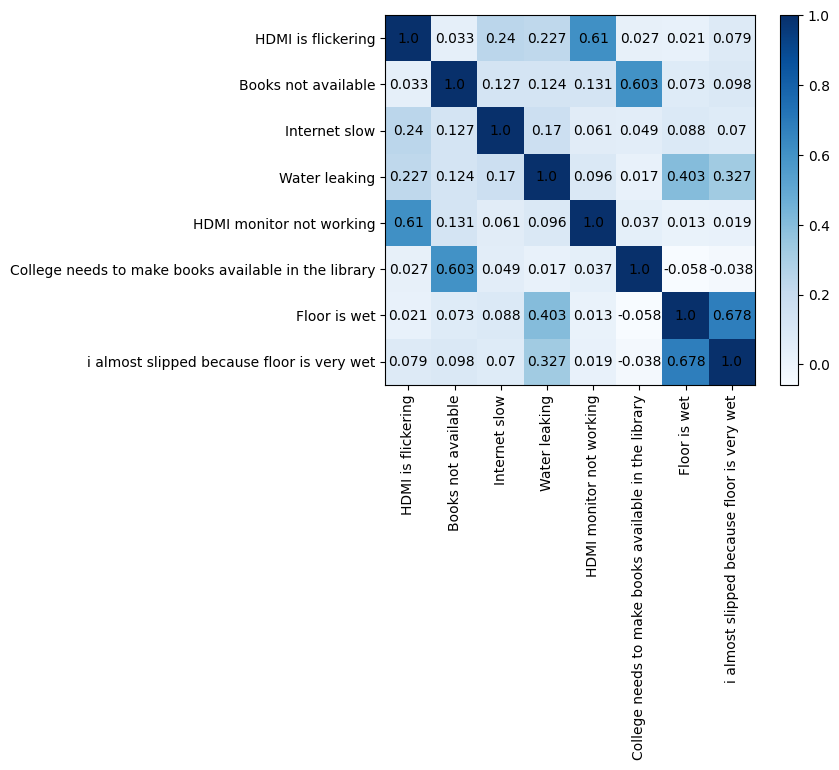

In [14]:
plt.imshow(cosine_scores, cmap='Blues')

# Add colorbar and axis labels
plt.colorbar()
plt.xticks(list(range(len(sentences))), sentences, rotation=90)
plt.yticks(list(range(len(sentences))), sentences)

# Add values inside the heatmap
for i in range(cosine_scores.shape[0]):
    for j in range(cosine_scores.shape[1]):
        plt.text(j, i, cosine_scores[i,j].numpy().round(3), ha='center', va='center', color='black')

# Show the plot
plt.show()

### While trying to work with Tripadvisor review data
- 100 data => 3 seconds appx
- 1000 data => 30 seconds appx.

In [15]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


### Back to our sample

In [16]:
cols = ['sentence1', 'sentence2', 'similarity']
sentence_df = pd.DataFrame(columns=cols)
for each in pairs:
    sentence_dict = {'sentence1': sentences[each['index'][0]],
                             'sentence2': sentences[each['index'][1]],
                             'similarity': each['score'].numpy().round(3)}
    sentence_df.loc[len(sentence_df)]=sentence_dict
sentence_df.sort_values(by=['similarity'], ascending=False)

,sentence1,sentence2,similarity
0,Floor is wet,i almost slipped because floor is very wet,0.678
1,HDMI is flickering,HDMI monitor not working,0.610
2,Books not available,College needs to make books available in the l...,0.603
3,Water leaking,Floor is wet,0.403
4,Water leaking,i almost slipped because floor is very wet,0.327
5,HDMI is flickering,Internet slow,0.240
6,HDMI is flickering,Water leaking,0.227
7,Internet slow,Water leaking,0.170
8,Books not available,HDMI monitor not working,0.131
9,Books not available,Internet slow,0.127


### Filtering only the pairs with similarity score greater than 0.3

In [17]:
most_similar_df = sentence_df[sentence_df.similarity > 0.3]
most_similar_df

,sentence1,sentence2,similarity
0,Floor is wet,i almost slipped because floor is very wet,0.678
1,HDMI is flickering,HDMI monitor not working,0.610
2,Books not available,College needs to make books available in the l...,0.603
3,Water leaking,Floor is wet,0.403
4,Water leaking,i almost slipped because floor is very wet,0.327


In [18]:
most_similar_df.to_dict()

{'sentence1': {0: 'Floor is wet',
  1: 'HDMI is flickering',
  2: 'Books not available',
  3: 'Water leaking',
  4: 'Water leaking'},
 'sentence2': {0: 'i almost slipped because floor is very wet',
  1: 'HDMI monitor not working',
  2: 'College needs to make books available in the library',
  3: 'Floor is wet',
  4: 'i almost slipped because floor is very wet'},
 'similarity': {0: 0.6779999732971191,
  1: 0.6100000143051147,
  2: 0.6029999852180481,
  3: 0.40299999713897705,
  4: 0.3269999921321869}}

In [19]:
# create a graph from the DataFrame
graph = nx.Graph()
for i, row in most_similar_df.iterrows():
    graph.add_edge(row['sentence1'], row['sentence2'])

# extract the clusters from the graph
clusters = [cluster for cluster in nx.connected_components(graph)]

# create a dictionary of cluster counts
cluster_counts = {}
for cluster in clusters:
    cluster_counts[tuple(sorted(cluster))] = len(cluster)

cluster_counts

{('Floor is wet',
  'Water leaking',
  'i almost slipped because floor is very wet'): 3,
 ('HDMI is flickering', 'HDMI monitor not working'): 2,
 ('Books not available',
  'College needs to make books available in the library'): 2}

In [20]:
df = pd.DataFrame(list(cluster_counts.items()), columns=['Sentences', 'Count'])
df

,Sentences,Count
0,"(Floor is wet, Water leaking, i almost slipped...",3
1,"(HDMI is flickering, HDMI monitor not working)",2
2,"(Books not available, College needs to make bo...",2


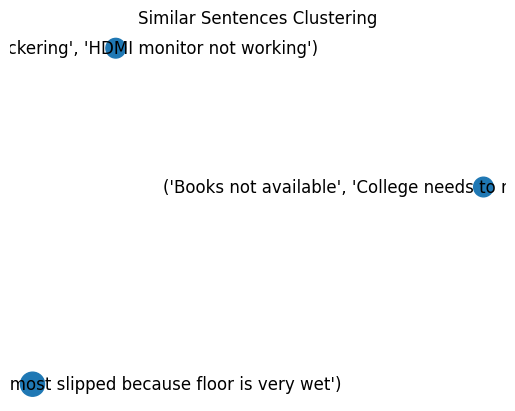

In [23]:
# Create a new graph
G = nx.Graph()

# Add nodes to the graph
for cluster, count in cluster_counts.items():
    G.add_node(cluster, size=count)

# Set node positions using spring layout
pos = nx.spring_layout(G)

# Draw nodes with labels and sizes
nx.draw_networkx_nodes(G, pos, node_size=[count*100 for count in cluster_counts.values()])
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Draw edges (none in this case)
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Set plot properties and show the graph
plt.axis('off')
plt.title('Similar Sentences Clustering')
plt.show()